In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm

#### $[1 \  X]$ Example

Initial Matrix: [[ 1 91]
 [ 1 98]
 [ 1  4]
 [ 1 56]
 [ 1 10]
 [ 1  5]
 [ 1 57]
 [ 1 18]
 [ 1 18]
 [ 1 78]] 



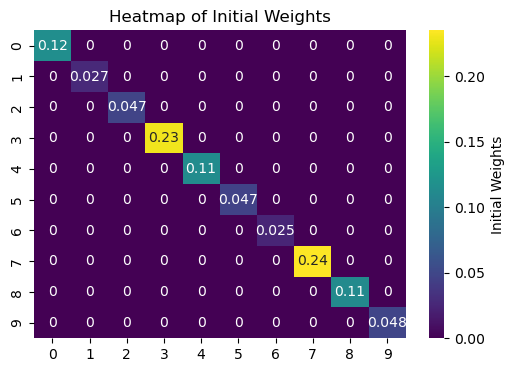

Iteration 1: max index = 1, max d_value = 4.815544887299294, alpha_i = 0.36895711758906646
Iteration 2: max index = 2, max d_value = 3.322036690235074, alpha_i = 0.2846717917496033
Iteration 3: max index = 1, max d_value = 2.7301787486741533, alpha_i = 0.2110125179937893
Iteration 4: max index = 2, max d_value = 2.515409599828822, alpha_i = 0.17005620126962437
Iteration 5: max index = 1, max d_value = 2.4011068544347314, alpha_i = 0.1431392806213041
Iteration 6: max index = 2, max d_value = 2.329406927884202, alpha_i = 0.12389243691112124
Iteration 7: max index = 1, max d_value = 2.279982549172231, alpha_i = 0.10936967435739527
Iteration 8: max index = 2, max d_value = 2.243741754599388, alpha_i = 0.0979872846183803
Iteration 9: max index = 1, max d_value = 2.2159778889142947, alpha_i = 0.08880831258664333
Iteration 10: max index = 2, max d_value = 2.1939997975623564, alpha_i = 0.08123945998919854
Iteration 11: max index = 1, max d_value = 2.1761530748036804, alpha_i = 0.07488526730803

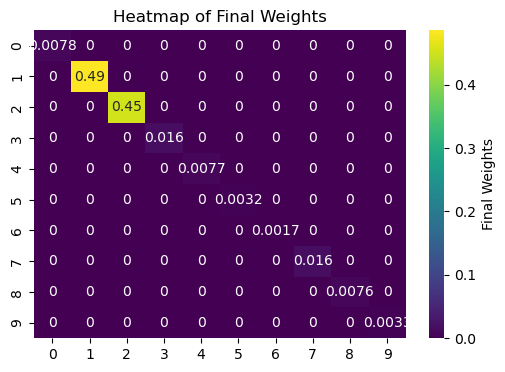

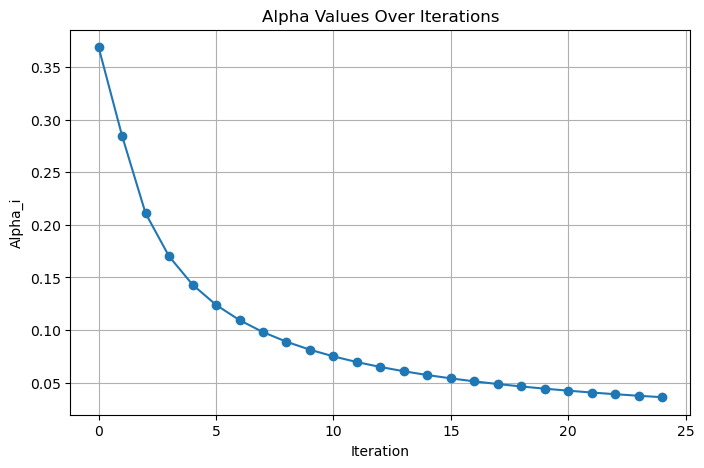

In [2]:
# Constants and parameters
num_points = 10  # Number of design points
num_iterations = 25  # Number of iterations
p = 2  # Degree of polynomial + 1

# Generate Matrix
X = np.random.randint(1, 101, size=num_points)
n = X.shape[0]
columns = [np.ones(n, dtype=np.int_)]
for d in range(1, p):
    columns.append(X**d)
X = np.column_stack(columns)

# Generate initial weights and normalize them to sum to 1
initial_weights = np.random.rand(num_points)
weights = np.diag(initial_weights / np.sum(initial_weights))  # Create a diagonal matrix of weights
print(f"Initial Matrix: {X} \n")

# Plot initial weights heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(weights, annot=True, cmap='viridis', cbar_kws={'label': 'Initial Weights'})
plt.title('Heatmap of Initial Weights')
plt.show()

alpha_history = []

# Iteration
for i in range(num_iterations):
    # Compute the information matrix M and its inverse
    M = X.T @ weights @ X
    M_inv = np.linalg.inv(M) if np.linalg.det(M) != 0 else None

    # Calculate d(X, Xi_i) for each design point
    d_values = np.array([x.T @ M_inv @ x for x in X])

    # Find x_i that maximizes d(X, Xi_i)
    max_index = np.argmax(d_values)
    x_i = X[max_index]
    d_xi = d_values[max_index]

    # Calculate alpha_i
    alpha_i = (d_xi - p) / (p * (np.max(d_values) - 1))
    alpha_history.append(alpha_i)
    print(f"Iteration {i+1}: max index = {max_index}, max d_value = {d_xi}, alpha_i = {alpha_i}")

    # Update the design measure Xi_i+1
    new_weights = (1 - alpha_i) * weights
    additional_weight = 1 - np.sum(new_weights)
    new_weights[max_index, max_index] += additional_weight  # Add the recalculated weight to x_i
    weights = new_weights  # Update Xi_n for the next iteration
    assert np.isclose(np.sum(weights), 1), "Sum of weights is not 1"

    # Check for convergence
    if np.abs(alpha_i) < 0.01:
        print("Convergence achieved.")
        break

# Output the final weights and design points
# print("Final design points:", X)
# print("Final weights matrix:", weights)

# Plot final weights heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(weights, annot=True, cmap='viridis', cbar_kws={'label': 'Final Weights'})
plt.title('Heatmap of Final Weights')
plt.show()

# Plot alpha_i value tracking after all iterations
plt.figure(figsize=(8, 5))
plt.plot(alpha_history, marker='o', linestyle='-')
plt.title('Alpha Values Over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Alpha_i')
plt.grid(True)
plt.show()


#### $[1 \  X \ X^2]$ Example
> Note: Essentially the same as the last example as it effectively assigns weights to the extreme points through iterations and $X^2$ doesn't change the monotonicity of $X$

Initial Matrix: [[    1    57  3249]
 [    1    64  4096]
 [    1    46  2116]
 [    1   100 10000]
 [    1    25   625]
 [    1    98  9604]
 [    1    67  4489]
 [    1    21   441]
 [    1     6    36]
 [    1    46  2116]] 



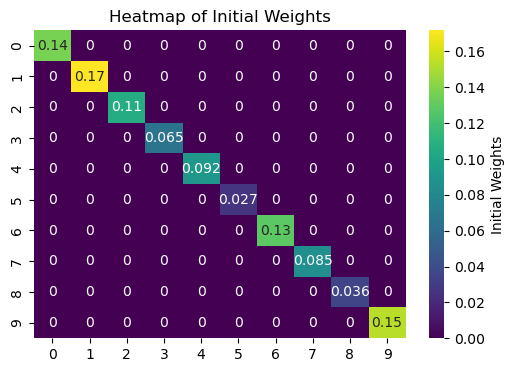

Iteration 1: max index = 8, max d_value = 12.119789484982915, alpha_i = 0.2733801599781193
Iteration 2: max index = 3, max d_value = 13.865748290075492, alpha_i = 0.2815161633067033
Iteration 3: max index = 8, max d_value = 4.147567854815803, alpha_i = 0.12152958599023424
Iteration 4: max index = 3, max d_value = 3.4134856423268083, alpha_i = 0.05710767241581385
Iteration 5: max index = 0, max d_value = 3.2645573948287083, alpha_i = 0.03894173690524037
Iteration 6: max index = 8, max d_value = 3.3063886289652307, alpha_i = 0.044281150932586326
Iteration 7: max index = 3, max d_value = 3.265889817946342, alpha_i = 0.03911484954540984
Iteration 8: max index = 0, max d_value = 3.2630068873330615, alpha_i = 0.038740033419726407
Iteration 9: max index = 8, max d_value = 3.2448920543527726, alpha_i = 0.03636285523216063
Iteration 10: max index = 3, max d_value = 3.23847988530042, alpha_i = 0.03551217753715549
Iteration 11: max index = 0, max d_value = 3.22547963458211, alpha_i = 0.0337724403

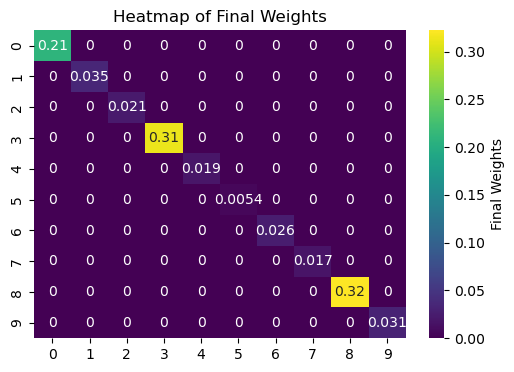

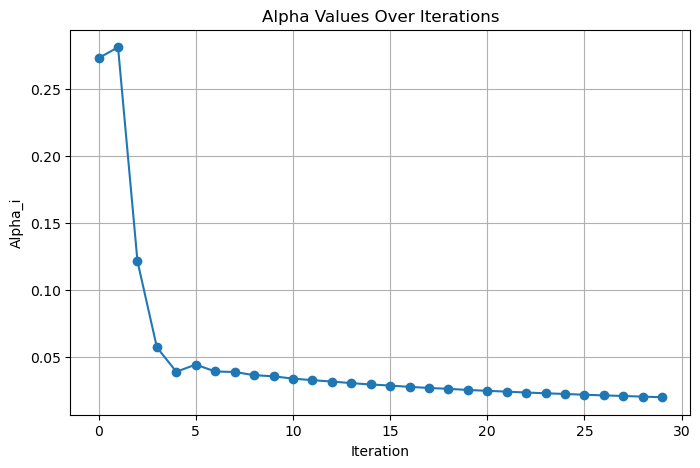

In [3]:
# Constants and parameters
num_points = 10  # Number of design points
num_iterations = 30  # Number of iterations
p = 3  # Degree of polynomial + 1

# Generate Matrix
X = np.random.randint(1, 101, size=num_points)
n = X.shape[0]
columns = [np.ones(n, dtype=np.int_)]
for d in range(1, p):
    columns.append(X**d)
X = np.column_stack(columns)

# Generate initial weights and normalize them to sum to 1
initial_weights = np.random.rand(num_points)
weights = np.diag(initial_weights / np.sum(initial_weights))  # Create a diagonal matrix of weights
print(f"Initial Matrix: {X} \n")
# print(f"Initial Weights Matrix: {weights}\n")

# Plot initial weights heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(weights, annot=True, cmap='viridis', cbar_kws={'label': 'Initial Weights'})
plt.title('Heatmap of Initial Weights')
plt.show()

alpha_history = []

# Iteration
for i in range(num_iterations):
    # Compute the information matrix M and its inverse
    M = X.T @ weights @ X
    M_inv = np.linalg.inv(M) if np.linalg.det(M) != 0 else None

    # Calculate d(X, Xi_i) for each design point
    d_values = np.array([x.T @ M_inv @ x for x in X])

    # Find x_i that maximizes d(X, Xi_i)
    max_index = np.argmax(d_values)
    x_i = X[max_index]
    d_xi = d_values[max_index]

    # Calculate alpha_i
    alpha_i = (d_xi - p) / (p * (np.max(d_values) - 1))
    alpha_history.append(alpha_i)
    print(f"Iteration {i+1}: max index = {max_index}, max d_value = {d_xi}, alpha_i = {alpha_i}")

    # Update the design measure Xi_i+1
    new_weights = (1 - alpha_i) * weights
    additional_weight = 1 - np.sum(new_weights)
    new_weights[max_index, max_index] += additional_weight  # Add the recalculated weight to x_i
    weights = new_weights  # Update Xi_n for the next iteration
    assert np.isclose(np.sum(weights), 1), "Sum of weights is not 1"

    # Check for convergence
    if np.abs(alpha_i) < 0.01:
        print("Convergence achieved.")
        break

# Output the final weights and design points
# print("Final design points:", X)
# print("Final weights matrix:", weights)

# Plot final weights heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(weights, annot=True, cmap='viridis', cbar_kws={'label': 'Final Weights'})
plt.title('Heatmap of Final Weights')
plt.show()

# Plot alpha_i value tracking after all iterations
plt.figure(figsize=(8, 5))
plt.plot(alpha_history, marker='o', linestyle='-')
plt.title('Alpha Values Over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Alpha_i')
plt.grid(True)
plt.show()


#### $[1 \quad  X_1 \quad  X_2 \quad  X_1^2 \quad  X_2^2 \quad  X_1X_2]$ Example

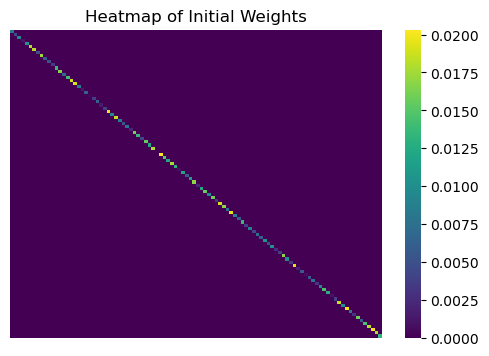

Optimizing:   0%|          | 0/100 [00:00<?, ?iteration/s]

Convergence achieved after 65 iterations.


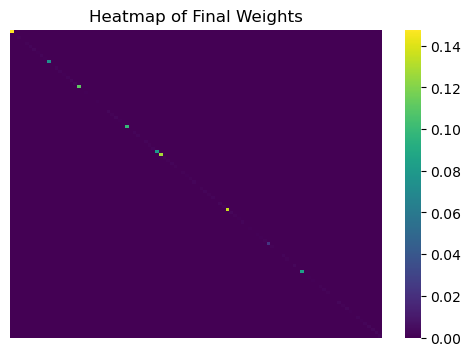

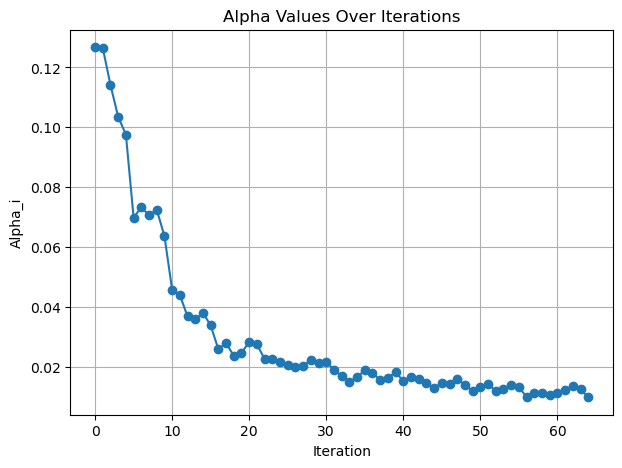

Standout weights (significantly above average) and their indices:
Index: 0, Weight: 0.1477
Index: 10, Weight: 0.0736
Index: 18, Weight: 0.1109
Index: 31, Weight: 0.0989
Index: 39, Weight: 0.0804
Index: 40, Weight: 0.1280
Index: 58, Weight: 0.1352
Index: 78, Weight: 0.0828


In [4]:
# Constants and parameters
num_obs = 100 # Number of observations
X1 = np.random.randint(1, 10, size=num_obs)  # First predictor
X2 = np.random.randint(1, 10, size=num_obs)  # Second predictor
num_iterations = 100  # Number of iterations

# Create a design matrix with interaction and quadratic terms
X = np.column_stack([np.ones(num_obs, dtype=np.int_), X1, X2, X1**2, X2**2, X1*X2])

# Generate initial weights and normalize them to sum to 1
initial_weights = np.random.rand(num_obs)
weights = np.diag(initial_weights / np.sum(initial_weights))

# Visualize the initial weights
plt.figure(figsize=(6, 4))
sns.heatmap(weights, annot=False, cmap='viridis')
plt.title('Heatmap of Initial Weights')
plt.axis('off')
plt.show()

alpha_history = []

# Iteration with a progress bar
for i in tqdm(range(num_iterations), desc='Optimizing', unit='iteration'):
    # Compute the information matrix M and its inverse
    M = X.T @ weights @ X
    if np.linalg.det(M) == 0:
        print("Matrix M is singular at iteration", i)
        break
    M_inv = np.linalg.inv(M)

    # Calculate d(X, Xi_i) for each design point
    d_values = np.array([x.T @ M_inv @ x for x in X])

    # Find x_i that maximizes d(X, Xi_i)
    max_index = np.argmax(d_values)
    x_i = X[max_index]
    d_xi = d_values[max_index]

    # Calculate alpha_i
    alpha_i = (d_xi - X.shape[1]) / (X.shape[1] * (np.max(d_values) - 1))
    alpha_history.append(alpha_i)
    if alpha_i < 0 or alpha_i > 1:  # Sanity check for alpha
        print("Alpha out of bounds:", alpha_i, "at iteration", i)
        break

    # Update the design measure Xi_i+1
    new_weights = (1 - alpha_i) * weights
    additional_weight = 1 - np.sum(new_weights)
    new_weights[max_index, max_index] += additional_weight
    weights = new_weights  # Update weights for the next iteration
    assert np.isclose(np.sum(weights), 1), "Sum of weights is not 1"

    # Check for convergence
    if np.abs(alpha_i) < 0.01:
        print("Convergence achieved after", i+1, "iterations.")
        break

# Visualize the final weights
plt.figure(figsize=(6, 4))
sns.heatmap(weights, annot=False, cmap='viridis')
plt.title('Heatmap of Final Weights')
plt.axis('off')
plt.show()

# Plot alpha_i value tracking after all iterations
plt.figure(figsize=(7, 5))
plt.plot(alpha_history, marker='o', linestyle='-')
plt.title('Alpha Values Over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Alpha_i')
plt.grid(True)
plt.show()

# Analyze and print standout weights along with their locations
final_weights = np.diag(weights)
average_weight = np.mean(final_weights)
standout_threshold = average_weight + 2 * np.std(final_weights)
standout_indices = np.where(final_weights > standout_threshold)[0]  # Get indices of standout weights
standout_weights = final_weights[standout_indices]  # Get the standout weights using indices

print("Standout weights (significantly above average) and their indices:")
for index, weight in zip(standout_indices, standout_weights):
    print(f"Index: {index}, Weight: {weight:.4f}")

